In [72]:
## This dataset contains detailed data related to the FIFA World Cup, including information on players'
# overall ratings, as well as their individual ratings for specific skillsets.
# The data was taken in 2018

##  Import Required Libraries

In [73]:
import pandas as pd 
import numpy as np  
import matplotlib as mpl
import seaborn as sns 
%matplotlib inline 
import matplotlib.pyplot as plt

## reading the data 

In [74]:
path = (r'C:\Users\dell\Downloads\portfolio\PYTHON PROJECTS\fourth\players_2018.csv')

In [75]:
df = pd.read_csv(path)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,...,84,95,95,86,68,94,75,33,6,14
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,...,91,96,71,95,95,82,85,28,7,14
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,89,92,84,80,61,90,90,27,9,15
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,...,60,88,49,59,78,65,11,27,87,90
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,...,76,91,76,91,63,94,79,68,15,10


## Understand And Cleaning The Data

In [76]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'release_clause_eur', 'player_tags', 'player_traits',
       'team_position', 'team_jersey_number', 'joined', 'contract_valid_until',
       'nation_jersey_number', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'gk_positioning', 'attacking_finishing',
       'attacking_short_passing', 'skill_dribbling', 'skill_long_passing',
       'skill_ball_control', 'movement_sprint_speed', 'movement_reactions',
       'movement_balance', 'power_shot_power', 'power_jumping',
       'mentality_vision', 'mentality_penalties', 'defending_marking',
       'goalkeeping_diving', 'goalkeeping_positioning'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sofifa_id                 18278 non-null  int64  
 1   player_url                18278 non-null  object 
 2   short_name                18278 non-null  object 
 3   long_name                 18278 non-null  object 
 4   age                       18278 non-null  int64  
 5   dob                       18278 non-null  object 
 6   height_cm                 18278 non-null  int64  
 7   weight_kg                 18278 non-null  int64  
 8   nationality               18278 non-null  object 
 9   club                      18278 non-null  object 
 10  overall                   18278 non-null  int64  
 11  potential                 18278 non-null  int64  
 12  value_eur                 18278 non-null  int64  
 13  wage_eur                  18278 non-null  int64  
 14  player

In [78]:
df.isnull().sum()

sofifa_id                       0
player_url                      0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
release_clause_eur           1298
player_tags                 16779
player_traits               10712
team_position                 240
team_jersey_number            240
joined                       1288
contract_valid_until          240
nation_jersey_number        17152
shooting      

<AxesSubplot:>

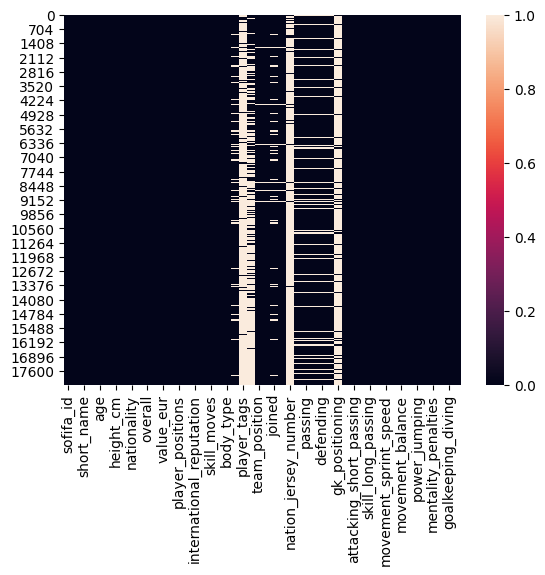

In [79]:
sns.heatmap(df.isnull())

In [80]:
## there are a few missing data in some columns but we can't not drop it 
## because most of them in ratings columns and the players has a different 
## postitions for example the striker have no goalkeepers ratings skills

In [81]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,64.415746,61.752544,63.856439,58.181694,64.928165,53.609749,48.383357,46.848889,16.572765,16.368038
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,14.847763,9.135613,14.201559,13.326083,11.934059,13.955626,15.708099,20.091287,17.738069,17.136497
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,11.000000,21.000000,12.000000,14.000000,19.000000,9.000000,7.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,57.000000,56.000000,56.000000,48.000000,58.000000,44.000000,39.000000,29.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,67.000000,62.000000,66.000000,59.000000,66.000000,55.000000,49.000000,52.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,75.000000,68.000000,74.000000,68.000000,73.000000,64.000000,60.000000,64.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,96.000000,96.000000,97.000000,95.000000,95.000000,94.000000,92.000000,94.000000,90.000000,91.000000


In [82]:
df['joined'].unique()

array(['7/1/2004', '7/10/2018', '8/3/2017', ..., '10/29/2018',
       '5/22/2019', '11/20/2016'], dtype=object)

In [83]:
## converting joined column to datetime type 

In [84]:
df['joined']= pd.to_datetime(df['joined'])

In [85]:
df['joined'].unique()

array(['2004-07-01T00:00:00.000000000', '2018-07-10T00:00:00.000000000',
       '2017-08-03T00:00:00.000000000', ...,
       '2018-10-29T00:00:00.000000000', '2019-05-22T00:00:00.000000000',
       '2016-11-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   sofifa_id                 18278 non-null  int64         
 1   player_url                18278 non-null  object        
 2   short_name                18278 non-null  object        
 3   long_name                 18278 non-null  object        
 4   age                       18278 non-null  int64         
 5   dob                       18278 non-null  object        
 6   height_cm                 18278 non-null  int64         
 7   weight_kg                 18278 non-null  int64         
 8   nationality               18278 non-null  object        
 9   club                      18278 non-null  object        
 10  overall                   18278 non-null  int64         
 11  potential                 18278 non-null  int64         
 12  value_eur         

In [87]:
## cheking for dupplicate 

In [88]:
df.duplicated().sum()

0

## correlations

In [89]:
df.corr()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,...,0.117895,-0.439012,0.040989,-0.283919,-0.189141,-0.229932,-0.147125,-0.131479,-0.113073,-0.123064
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,...,-0.144310,0.463331,-0.089609,0.261916,0.185964,0.195372,0.141375,0.157007,0.110313,0.121381
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,...,-0.474736,-0.019698,-0.789806,-0.174280,-0.041149,-0.371546,-0.335786,-0.077038,0.367433,0.367097
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,...,-0.420978,0.090986,-0.669125,-0.055855,0.031246,-0.280242,-0.246309,-0.049683,0.342329,0.344397
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,...,0.199009,0.864526,0.103872,0.567504,0.267553,0.509251,0.347950,0.303075,-0.013239,-0.006408
potential,0.042015,-0.262872,-0.002432,-0.011738,0.646650,1.000000,0.580868,0.475490,0.341221,0.171354,...,0.224803,0.517508,0.136335,0.349043,0.109935,0.348782,0.224729,0.167209,-0.049662,-0.049007
value_eur,-0.159848,0.081513,0.009527,0.051782,0.638230,0.580868,1.000000,0.858052,0.618133,0.169084,...,0.167567,0.556465,0.113643,0.356146,0.131904,0.365560,0.234947,0.154734,-0.022094,-0.020554
wage_eur,-0.228084,0.151031,0.019547,0.065946,0.573578,0.475490,0.858052,1.000000,0.652061,0.149405,...,0.125784,0.506015,0.093114,0.324117,0.133489,0.327220,0.222270,0.155790,-0.023629,-0.022428
international_reputation,-0.360765,0.259582,0.037935,0.090854,0.475557,0.341221,0.618133,0.652061,1.000000,0.127792,...,0.028050,0.427682,0.043043,0.288704,0.118041,0.280634,0.213138,0.115698,0.006039,0.008561
weak_foot,-0.092250,0.073988,-0.175200,-0.128568,0.230276,0.171354,0.169084,0.149405,0.127792,1.000000,...,0.256078,0.222600,0.253170,0.311594,0.073343,0.343377,0.343126,0.073902,-0.232714,-0.230529


In [90]:
## its hard to see the relations in this way 
## so I will try to reduce it by identifying the most closely related relationships 

In [91]:
corr_matrix = df.corr().abs()
threshold = 0.6
filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 
filtered_corr_df

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
sofifa_id,NaN,0.73668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.73668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height_cm,NaN,NaN,NaN,0.768816,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.789806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_kg,NaN,NaN,0.768816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.669125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,NaN,NaN,NaN,NaN,NaN,0.646650,0.638230,NaN,NaN,NaN,...,NaN,0.864526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
potential,NaN,NaN,NaN,NaN,0.646650,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value_eur,NaN,NaN,NaN,NaN,0.638230,NaN,NaN,0.858052,0.618133,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wage_eur,NaN,NaN,NaN,NaN,NaN,NaN,0.858052,NaN,0.652061,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
international_reputation,NaN,NaN,NaN,NaN,NaN,NaN,0.618133,0.652061,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weak_foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


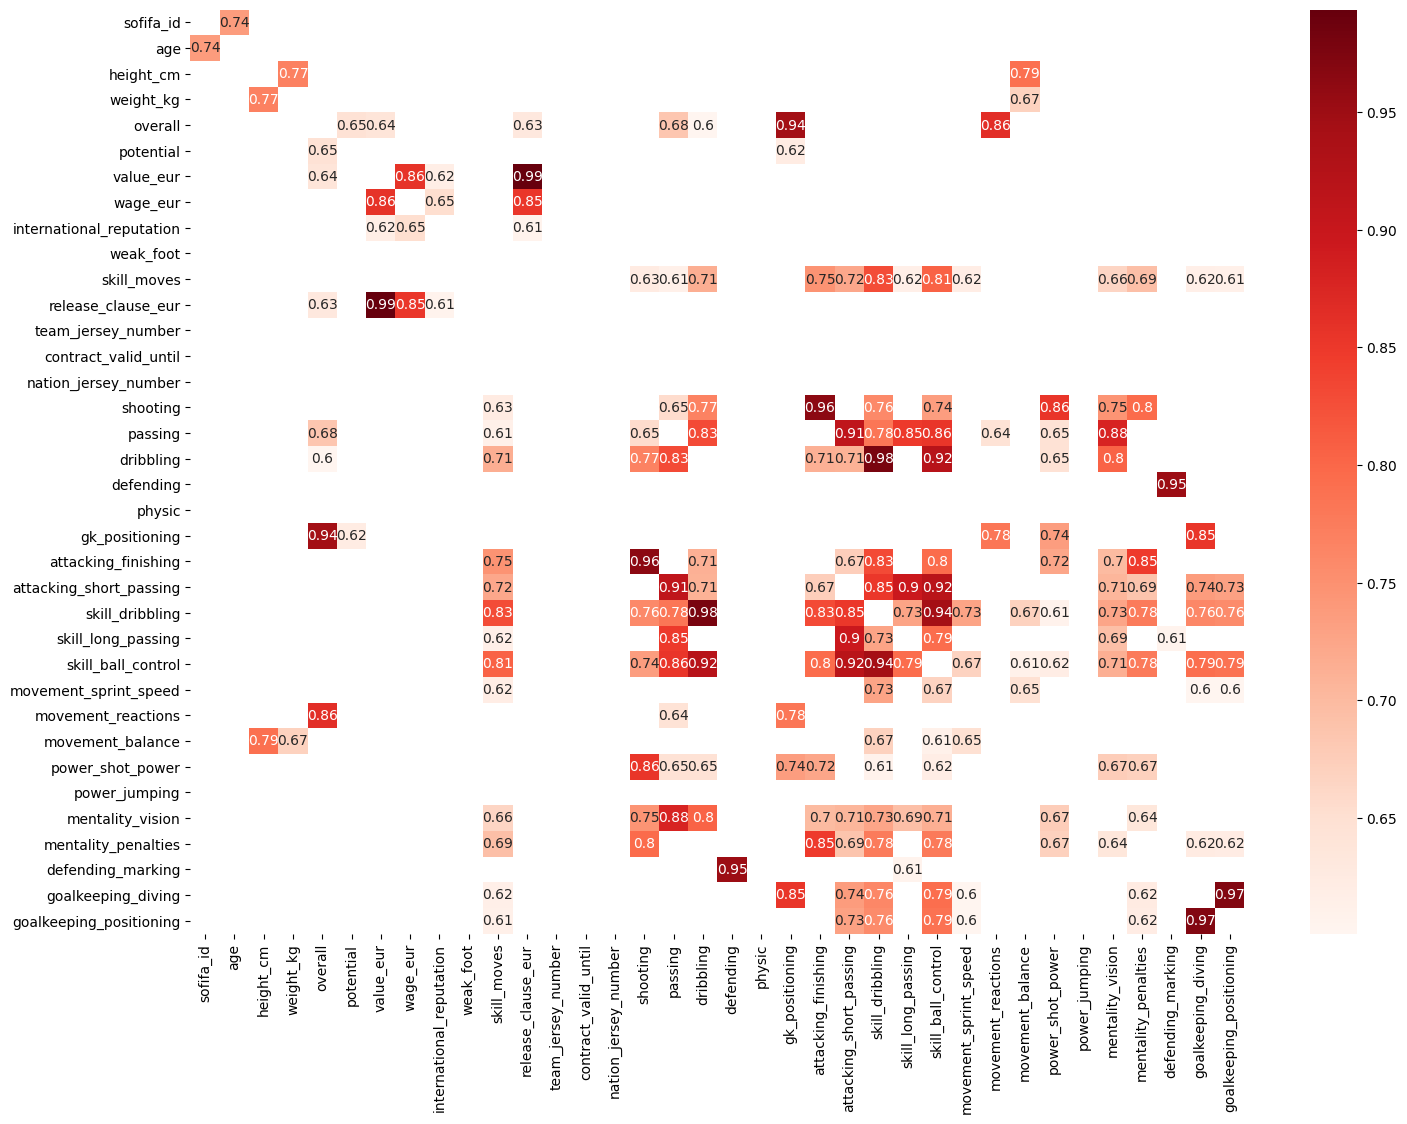

In [92]:
plt.figure(figsize=(17,12))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

In [93]:
## drop useless columns

In [94]:
df.drop('player_url',axis=1,inplace=True)

In [95]:
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,94,...,84,95,95,86,68,94,75,33,6,14
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,93,...,91,96,71,95,95,82,85,28,7,14
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,92,...,89,92,84,80,61,90,90,27,9,15
3,200389,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,91,...,60,88,49,59,78,65,11,27,87,90
4,192985,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,91,...,76,91,76,91,63,94,79,68,15,10


###  Analyzing and visualizations

In [96]:
## Top 10 release clause players
df_release = df.sort_values(by='release_clause_eur',ascending=False).head(10)
df_release_1 = df[['short_name','release_clause_eur']].sort_values(by='release_clause_eur',ascending=False).set_index('short_name').head(10)
df_release

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,94,...,84,95,95,86,68,94,75,33,6,14
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,92,...,89,92,84,80,61,90,90,27,9,15
10,231747,K. Mbappé,Kylian Mbappé,20,12/20/1998,178,73,France,Paris Saint-Germain,89,...,96,89,83,83,76,80,70,34,13,11
5,183277,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,91,...,88,90,94,82,56,89,88,34,11,8
4,192985,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,91,...,76,91,76,91,63,94,79,68,15,10
3,200389,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,91,...,60,88,49,59,78,65,11,27,87,90
13,202126,H. Kane,Harry Kane,25,7/28/1993,188,89,England,Tottenham Hotspur,89,...,72,91,73,90,79,81,90,56,8,14
7,203376,V. van Dijk,Virgil van Dijk,27,7/8/1991,193,92,Netherlands,Liverpool,90,...,79,88,53,81,90,65,62,91,13,11
6,209331,M. Salah,Mohamed Salah Ghaly,27,6/15/1992,175,71,Egypt,Liverpool,90,...,92,92,88,80,69,84,77,38,14,11
8,192448,M. ter Stegen,Marc-André ter Stegen,27,4/30/1992,187,85,Germany,FC Barcelona,90,...,50,86,43,66,79,70,25,25,88,88


In [97]:
df_release_1

,release_clause_eur
short_name,
L. Messi,195800000.0
Neymar Jr,195200000.0
K. Mbappé,191700000.0
E. Hazard,184500000.0
K. De Bruyne,166500000.0
J. Oblak,164700000.0
H. Kane,159800000.0
V. van Dijk,150200000.0
M. Salah,148900000.0


C:\Users\dell\AppData\Local\Temp\ipykernel_12248\913957779.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='black',


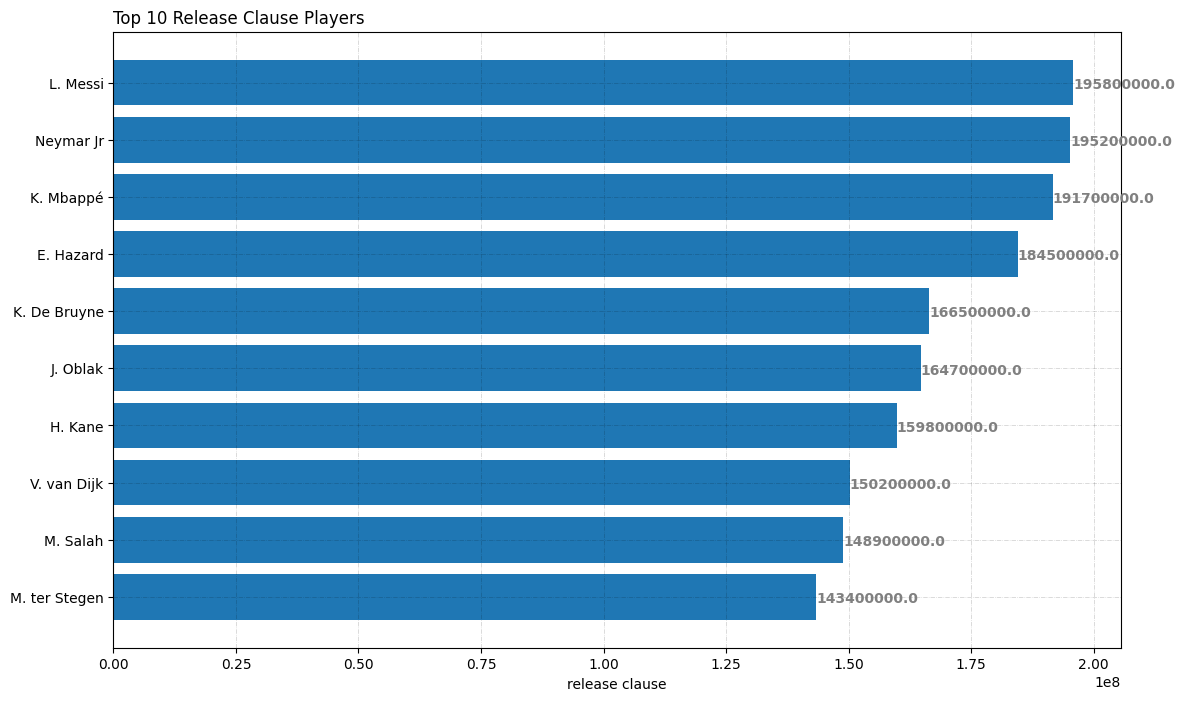

In [98]:
name = df_release['short_name']
clause = df_release['release_clause_eur']
fig, ax = plt.subplots(figsize=(13, 8))
ax.barh(name , clause)
ax.grid(b=True, color='black',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('Top 10 Release Clause Players',
             loc='left', )    
plt.xlabel("release clause") 
plt.show()

In [99]:
## Top 10 most paid(wages) players and in which club they play
df_wage = df.sort_values(by='wage_eur',ascending=False).head(10)
df_wage_1 = df[['short_name','wage_eur']].sort_values(by='wage_eur',ascending=False).set_index('short_name').head(10)
df_wage

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,94,...,84,95,95,86,68,94,75,33,6,14
5,183277,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,91,...,88,90,94,82,56,89,88,34,11,8
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,93,...,91,96,71,95,95,82,85,28,7,14
4,192985,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,91,...,76,91,76,91,63,94,79,68,15,10
15,194765,A. Griezmann,Antoine Griezmann,28,3/21/1991,176,73,France,FC Barcelona,89,...,81,92,83,82,89,86,86,59,14,13
19,176580,L. Suárez,Luis Alberto Suárez Díaz,32,1/24/1987,182,86,Uruguay,FC Barcelona,89,...,70,92,79,88,69,82,83,57,27,33
9,177003,L. Modrić,Luka Modrić,33,9/9/1985,172,66,Croatia,Real Madrid,90,...,71,89,93,79,68,91,82,68,13,14
32,182521,T. Kroos,Toni Kroos,29,1/4/1990,183,76,Germany,Real Madrid,88,...,41,87,71,87,30,89,73,72,10,7
17,189511,Sergio Busquets,Sergio Busquets i Burgos,30,7/16/1988,189,76,Spain,FC Barcelona,89,...,43,87,49,61,66,86,60,90,5,9
21,153079,S. Agüero,Sergio Leonel Agüero del Castillo,31,6/2/1988,173,70,Argentina,Manchester City,89,...,78,92,91,89,81,83,83,30,13,11


In [100]:
df_wage_1

,wage_eur
short_name,
L. Messi,565000
E. Hazard,470000
Cristiano Ronaldo,405000
K. De Bruyne,370000
A. Griezmann,370000
L. Suárez,355000
L. Modrić,340000
T. Kroos,330000
Sergio Busquets,300000


C:\Users\dell\AppData\Local\Temp\ipykernel_12248\360640847.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='black',


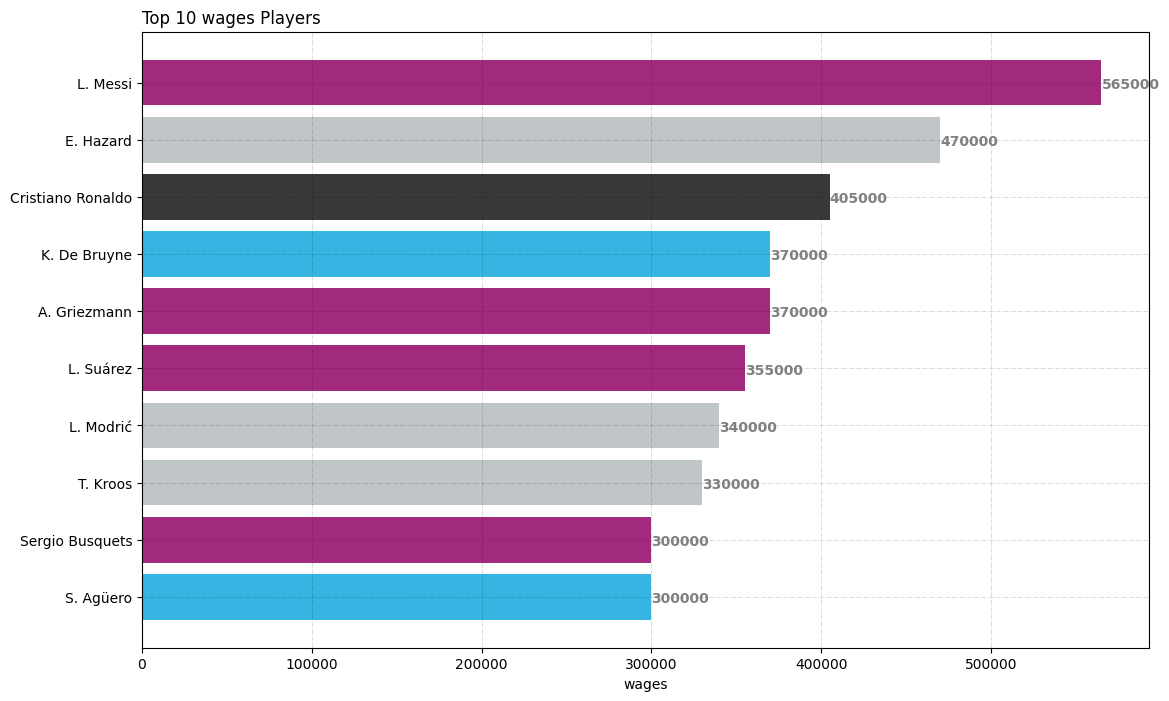

In [101]:
name = df_wage['short_name']
wage = df_wage['wage_eur']
#club = df_wage['club']
fig, ax = plt.subplots(figsize=(13, 8))
colors = {'FC Barcelona':'#A12A7D', 'Real Madrid':'#C0C5C7','Juventus':'#393838','Manchester City':'#37B5E2'}
ax.barh(name , wage,color=[colors[t] for t in df_wage['club']])
ax.grid(b=True, color='black',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey') 
ax.set_title('Top 10 wages Players',
             loc='left', ) 
plt.xlabel("wages") 
plt.show()

## Attacking

In [102]:
## Top strikers (attack) under 25 years
df_atta = df.sort_values(by='attacking_finishing',ascending=False)
df_atta_1 = df[(df_atta['age']<=25)].head(5)
a1 = df_atta_1[['short_name','age','club','wage_eur']]
a1
#df_atta[['attacking_finishing','short_name']]

C:\Users\dell\AppData\Local\Temp\ipykernel_12248\1253598634.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_atta_1 = df[(df_atta['age']<=25)].head(5)


,short_name,age,club,wage_eur
10,K. Mbappé,20,Paris Saint-Germain,155000
13,H. Kane,25,Tottenham Hotspur,220000
23,P. Dybala,25,Juventus,215000
24,Ederson,25,Manchester City,185000
26,R. Sterling,24,Manchester City,255000


In [103]:
## most nationalty with great players
## i will define player as  a good player depending on his overall rating 
## and then i will group by the national teams on the average rating of players 


In [104]:
df_overall = df.sort_values(by='overall',ascending=False).head(20)
df_overall

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,94,...,84,95,95,86,68,94,75,33,6,14
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,93,...,91,96,71,95,95,82,85,28,7,14
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,92,...,89,92,84,80,61,90,90,27,9,15
3,200389,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,91,...,60,88,49,59,78,65,11,27,87,90
4,192985,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,91,...,76,91,76,91,63,94,79,68,15,10
5,183277,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,91,...,88,90,94,82,56,89,88,34,11,8
6,209331,M. Salah,Mohamed Salah Ghaly,27,6/15/1992,175,71,Egypt,Liverpool,90,...,92,92,88,80,69,84,77,38,14,11
7,203376,V. van Dijk,Virgil van Dijk,27,7/8/1991,193,92,Netherlands,Liverpool,90,...,79,88,53,81,90,65,62,91,13,11
8,192448,M. ter Stegen,Marc-André ter Stegen,27,4/30/1992,187,85,Germany,FC Barcelona,90,...,50,86,43,66,79,70,25,25,88,88
9,177003,L. Modrić,Luka Modrić,33,9/9/1985,172,66,Croatia,Real Madrid,90,...,71,89,93,79,68,91,82,68,13,14


In [105]:
x = df_overall.groupby(['nationality']).agg({'overall':'mean'}).sort_values(by='overall',ascending=False)
x

,overall
nationality,
Portugal,93.0
Brazil,92.0
Argentina,91.5
Belgium,91.0
Slovenia,91.0
Croatia,90.0
Egypt,90.0
Germany,90.0
Netherlands,90.0


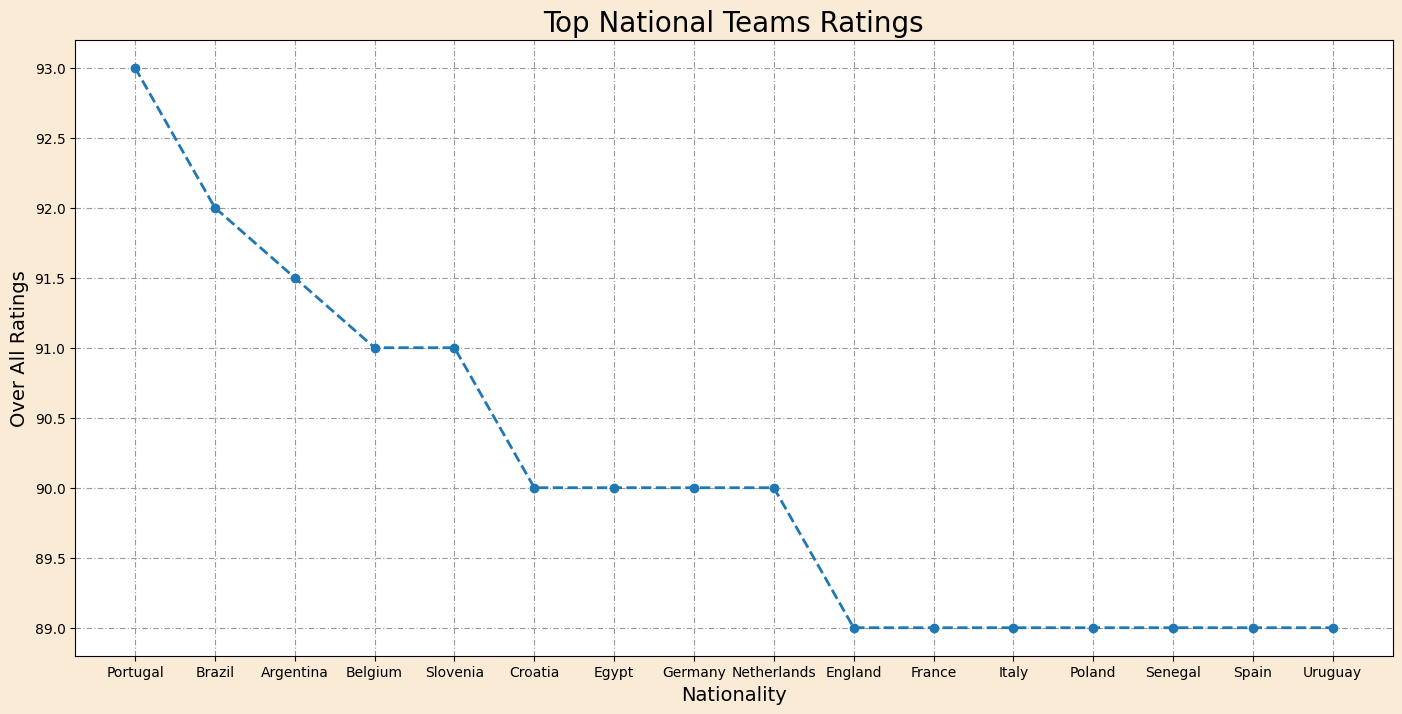

In [106]:
ax = plt.figure(figsize=(17, 8))
plt.plot(x, marker='.', linestyle='dashed',
     linewidth=2, markersize=12 )
plt.grid(True , color='0.6' , dashes=(5,2,1,2))
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Over All Ratings', fontsize=14)
plt.title('Top National Teams Ratings',fontsize=20)
ax.set_facecolor('#FAEBD7')
plt.show()

In [107]:
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,94,...,84,95,95,86,68,94,75,33,6,14
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,93,...,91,96,71,95,95,82,85,28,7,14
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,92,...,89,92,84,80,61,90,90,27,9,15
3,200389,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,91,...,60,88,49,59,78,65,11,27,87,90
4,192985,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,91,...,76,91,76,91,63,94,79,68,15,10


## playmakers

In [108]:
## top 10 play maker under 25 years old

In [109]:
## the postion of a play maker always been in the middle
## so im going to filter the column player postion to (CM , CAM , CDM)

In [110]:
## filtering the column to center players
searchfor = ['CM', 'CAM' , 'CDM']
df_mid = df[df['player_positions'].str.contains('|'.join(searchfor))]
df_mid

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,92,...,89,92,84,80,61,90,90,27,9,15
4,192985,K. De Bruyne,Kevin De Bruyne,28,6/28/1991,181,70,Belgium,Manchester City,91,...,76,91,76,91,63,94,79,68,15,10
9,177003,L. Modrić,Luka Modrić,33,9/9/1985,172,66,Croatia,Real Madrid,90,...,71,89,93,79,68,91,82,68,13,14
11,215914,N. Kanté,N'Golo Kanté,28,3/29/1991,168,72,France,Chelsea,89,...,77,93,92,71,77,79,54,90,15,7
17,189511,Sergio Busquets,Sergio Busquets i Burgos,30,7/16/1988,189,76,Spain,FC Barcelona,89,...,43,87,49,61,66,86,60,90,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18269,241828,L. Offord,Luke Offord,19,11/19/1999,170,66,England,Crewe Alexandra,48,...,56,51,55,29,52,39,23,46,8,10
18271,240927,L. Collins,Lewis Collins,18,5/9/2001,178,67,Wales,Newport County,48,...,71,48,66,49,60,49,36,33,5,13
18272,240917,Zhang Yufeng,张宇峰,21,1/5/1998,178,76,China PR,Beijing Renhe FC,48,...,70,50,66,42,55,50,43,53,15,6
18275,237599,A. De Angelis,Alessandro De Angelis,21,3/13/1998,174,62,Italy,Ascoli,48,...,45,45,59,31,33,38,11,40,15,12


In [111]:
## get the players who is youngest than 25 years old

In [112]:
df_mid25 = df_mid[df_mid['age']<=25]
df_mid25

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
23,211110,P. Dybala,Paulo Bruno Exequiel Dybala,25,11/15/1993,177,75,Argentina,Juventus,88,...,81,84,85,80,75,87,86,32,5,5
40,218667,Bernardo Silva,Bernardo Mota Veiga de Carvalho e Silva,24,8/10/1994,173,64,Portugal,Manchester City,87,...,78,85,92,74,51,85,68,49,9,12
57,212622,J. Kimmich,Joshua Kimmich,24,2/8/1995,176,73,Germany,FC Bayern München,86,...,68,87,84,76,79,84,44,78,8,15
58,207865,Marquinhos,Marcos Aoás Corrêa,25,5/14/1994,183,75,Brazil,Paris Saint-Germain,86,...,76,85,68,61,89,68,47,86,6,10
74,231866,Rodri,Rodrigo Hernández Cascante,23,6/22/1996,191,82,Spain,Manchester City,85,...,66,82,72,74,69,82,46,82,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18268,242696,Liu Guobo,刘国博,19,11/27/1999,189,75,China PR,Beijing Sinobo Guoan FC,48,...,63,45,68,45,55,48,41,48,9,9
18269,241828,L. Offord,Luke Offord,19,11/19/1999,170,66,England,Crewe Alexandra,48,...,56,51,55,29,52,39,23,46,8,10
18271,240927,L. Collins,Lewis Collins,18,5/9/2001,178,67,Wales,Newport County,48,...,71,48,66,49,60,49,36,33,5,13
18272,240917,Zhang Yufeng,张宇峰,21,1/5/1998,178,76,China PR,Beijing Renhe FC,48,...,70,50,66,42,55,50,43,53,15,6


In [113]:
## now im going to select the top 10 play maker according to the 
## passing rate column 

In [114]:
top_10 = df_mid25[['short_name','passing']].set_index('short_name').sort_values(by='passing',ascending=False).head(10)
top_10

,passing
short_name,
Bruno Fernandes,87.0
J. Kimmich,86.0
J. Ward-Prowse,85.0
P. Dybala,84.0
F. de Jong,84.0
Bernardo Silva,83.0
Rúben Neves,83.0
T. Lemar,82.0
R. Guerreiro,82.0


<Figure size 1700x800 with 0 Axes>

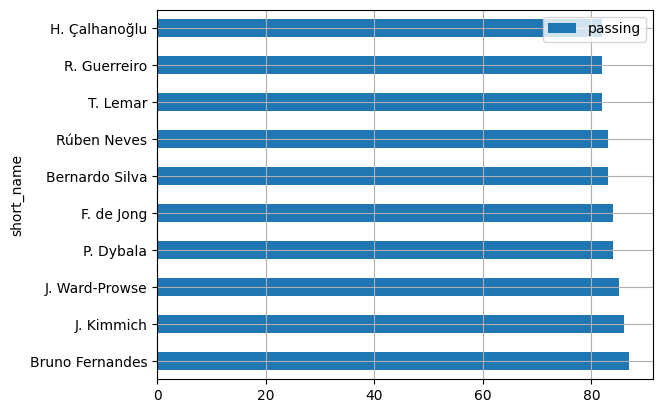

In [115]:
ax = plt.figure(figsize=(17, 8))
top_10.plot(kind='barh')

plt.grid()

## Goal Keepers

In [116]:
## GK under 25 Years and their contracts will end in 2019 (next year)
## and their overall rating above 70

In [117]:
df_gk = df[(df['age']<=25) & (df['overall']>=70) & (df['contract_valid_until']==2019)].sort_values(by='overall',ascending=False)
df_gk

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,movement_sprint_speed,movement_reactions,movement_balance,power_shot_power,power_jumping,mentality_vision,mentality_penalties,defending_marking,goalkeeping_diving,goalkeeping_positioning
1363,221634,L. Acosta,Luciano Federico Acosta,25,5/31/1994,161,61,Argentina,DC United,76,...,76,74,90,71,57,73,54,47,13,12
1824,213597,D. Valdés,Diego Valdés,25,1/30/1994,178,75,Chile,Santos Laguna,75,...,79,70,67,75,68,75,55,50,8,8
1755,223816,J. Rodríguez,Jonathan Javier Rodríguez Portillo,25,7/6/1993,179,77,Uruguay,Cruz Azul,75,...,84,72,76,78,70,57,76,23,12,7
1813,215107,H. Villalba,Héctor Villalba,24,7/26/1994,172,75,Paraguay,Atlanta United,75,...,92,73,91,85,53,70,64,44,13,10
2260,226591,H. Preciado,Harold Fabián Preciado Villarreal,25,6/1/1994,182,70,Colombia,Shenzhen FC,74,...,79,69,56,77,84,67,76,42,8,11
2276,224574,O. Pineda,Orbelín Pineda Alvarado,23,3/24/1996,169,64,Mexico,Cruz Azul,74,...,87,70,85,72,65,72,63,57,15,10
2238,229595,L. Rodríguez,Lucas Rodríguez,22,4/27/1997,168,64,Argentina,DC United,74,...,78,63,85,61,50,68,62,65,14,14
2738,231150,Jamiro Monteiro,Jamiro Gregory Monteiro Alvarenga,25,11/23/1993,175,72,Cape Verde,Philadelphia Union,73,...,77,65,76,63,52,67,65,56,5,8
2854,220287,J. Dinenno,Juan Dinenno,24,8/28/1994,186,84,Argentina,Deportivo Cali,73,...,70,66,44,76,77,59,68,25,16,8
2786,226807,C. Roldan,Cristian Roldan,24,6/3/1995,173,75,United States,Seattle Sounders FC,73,...,69,70,84,70,83,68,61,70,13,16


In [118]:
## now we want the top 10 with their market values(value_eur)
df_gk[['short_name','value_eur']].set_index('short_name').head(10)

,value_eur
short_name,
L. Acosta,10000000
D. Valdés,8500000
J. Rodríguez,8500000
H. Villalba,8500000
H. Preciado,7500000
O. Pineda,8000000
L. Rodríguez,8000000
Jamiro Monteiro,4900000
J. Dinenno,5500000


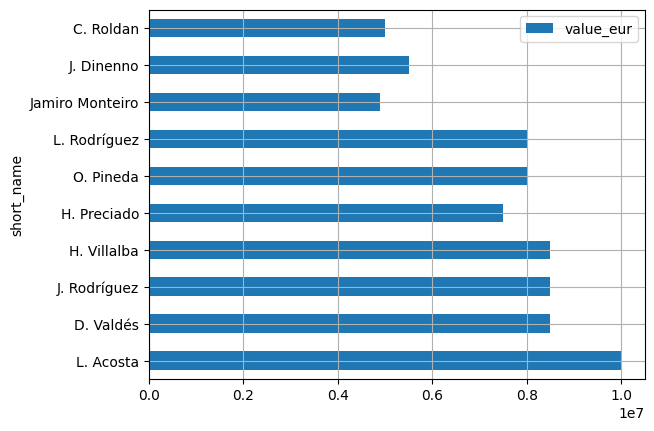

In [119]:
df_gk[['short_name','value_eur']].set_index('short_name').head(10).plot(kind='barh')
plt.grid()